# Week 9 Homework: Probability and Statistics

While the Belize dataset is not normally distributed, act as if it is for the purposes of the homework.

1. Why is assuming normal data an important consideration when answering questions about probability?

Most of the techniques that we use for computing probability and statistics rely on the normality of the data set. When that assumption does not hold, our results are inaccurate, biased, or worse. That being said, if your data set is not normally distributed, but you know what the distribution is (e.g. Poisson distribution), then you can compute probabilites using techniques appropriate to that distribution. The most important thing is knowing how your data set is distributed. You can always normalize it, if needed. 

In [1]:
# Setting dependencies, importing dataframe

import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
belize = 'belize_airbnb_listings.csv'
df = pd.read_csv(belize)
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


2. 	Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data.
a. How do you choose your bin size?

In [3]:
#Rice formula for choosing bin size.

n = df['id'].count() #get row count
k = 2*(n**(1/3))
k  # Round up to next integer

28.17576510491762

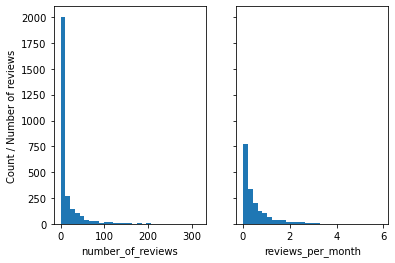

In [4]:
fig, ax = plt.subplots(1,2, sharey = True)
ax[0].hist(df['number_of_reviews'], bins = 29, histtype='bar')
ax[1].hist(df['reviews_per_month'], bins = 29, histtype='bar')
ax[0].set_xlabel('number_of_reviews')
ax[1].set_xlabel('reviews_per_month')
ax[0].set_ylabel('Count / Number of reviews')
plt.show()


3.	Create a box and whisker plot for availability_365. What does this show you?


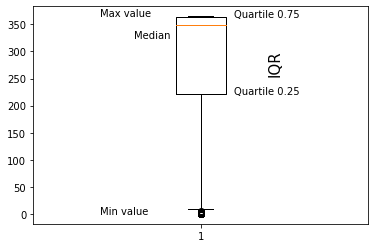

In [5]:
plt.boxplot(df['availability_365'])
plt.text(x=0.8, y=325, s='Median')
plt.text(x=1.1, y=221, s='Quartile 0.25')
plt.text(x=1.1, y=364, s= 'Quartile 0.75')
plt.text(x=1.2, y=260, s= 'IQR', rotation = 90, size = 15)
plt.text(x=0.7, y=365, s= 'Max value')
plt.text(x=0.7, y=0, s= 'Min value')
plt.show()

4.	What is the probability that the price for an Airbnb is under $50.


In [6]:
stats.norm.cdf(50,df['price'].mean(), df['price'].std())

0.29275508850857496

The probability that a randomly drawn Airbnb listing from this data set is under $50/night is 0.29. 

a.	What do you notice about these records? Hint: look at the other columns.

There's some missing data (NaNs)? Not sure what you're looking for here.


b.	What distribution does this data most closely fit?


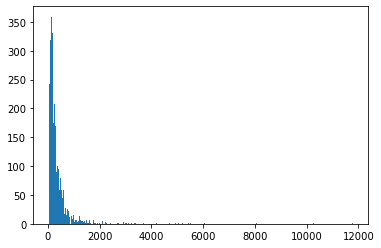

In [7]:
plt.hist(df['price'], bins = 'auto');

On inspection, the price feature looks like a heavily right-skewed normal distribution. 

5.	Calculate the sample variance and standard deviation for all the numerical columns in the same output. 

In [11]:
#Sample variance
np.var(df, ddof=1)

id                                1.661428e+14
host_id                           1.036327e+16
latitude                          2.888413e-01
longitude                         1.473608e-01
price                             3.171096e+05
minimum_nights                    3.214712e+01
number_of_reviews                 9.197735e+02
reviews_per_month                 4.384482e-01
calculated_host_listings_count    2.674046e+03
availability_365                  1.454861e+04
dtype: float64

In [12]:
#Sample standard deviation
np.std(df, ddof=1)

id                                1.288964e+07
host_id                           1.018001e+08
latitude                          5.374396e-01
longitude                         3.838760e-01
price                             5.631248e+02
minimum_nights                    5.669843e+00
number_of_reviews                 3.032777e+01
reviews_per_month                 6.621542e-01
calculated_host_listings_count    5.171118e+01
availability_365                  1.206176e+02
dtype: float64

a.	Why sample variance and not population variance?

It really depends on how you define "population". For example, if I computed a variance on data collected from 250 houseflies, that would clearly be a sample variance, because the global population of houseflies is much larger. But if I collected data on 250 Northern Bald Ibis and computed a variance, that would be a population variance because there are only 250 in existence. I don't know the extent of this data set (e.g. is this one year from a larger set of several years), but I'm assuming its a selection from a larger data set, so, in that case, it would be a sample. 

We enforce the sample variance by specifying the degree of freedom as "one". You need to divide the population variance by (N-1) in order to obtain an unbiased estimator of the sample variance. 

b.	What is your takeaway for each metric?

I understand this to mean the variance vs. the standard deviation. Variances are larger but more difficult to interpret, as they are expressed in units squared (e.g. 'dollars per night, squared). Standard deviations are smaller but easier to interpret, as they are expressed in terms of the units of the original variable.

c.	What are the scales of measurement for each of these values?

Nominal: id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type;
Interval: last_review, latitude, longitude
Ratio: price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365

6.	What percent of Airbnb listings in Belize are available 360 days a year or more?

a.	360 days or less?

b.	What distribution does this data most closely fit?

As stated previously, given the skew, I'm inclined to suggest exponential distribution, but a few other obscure ones come to mind.

7.	What minimum night count are 75% of Airnbnb listing in Belize greater than?

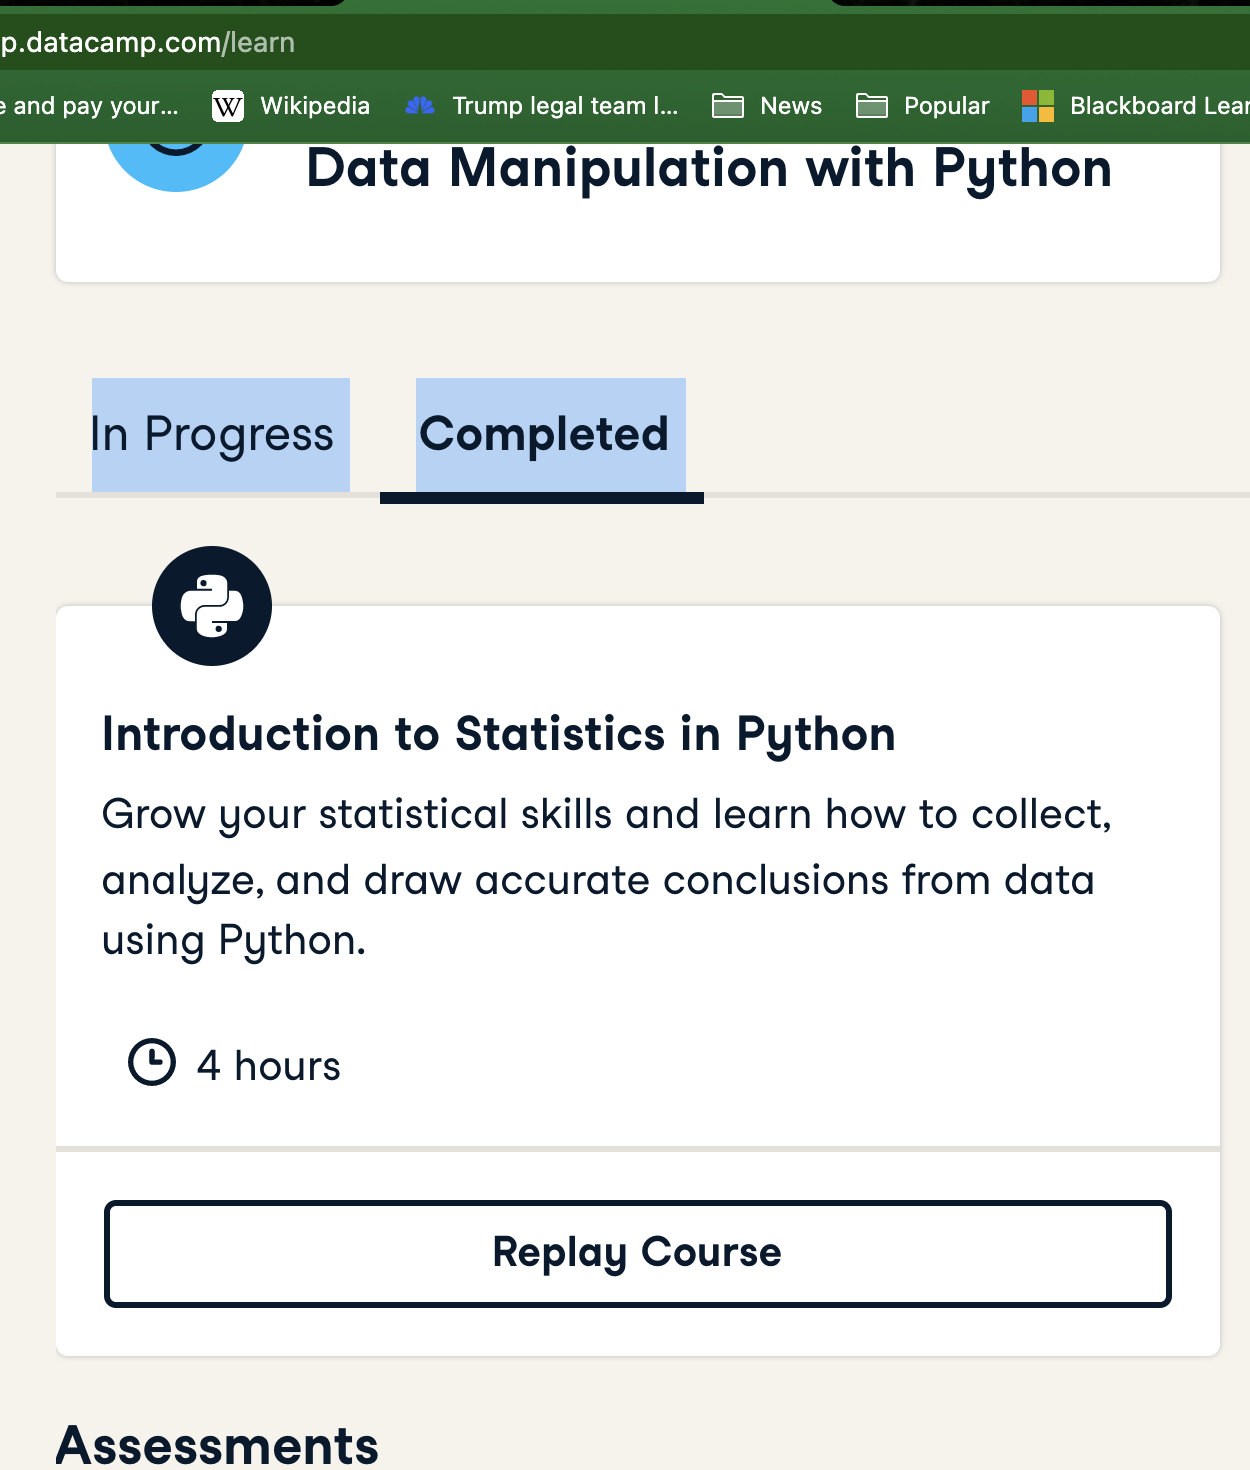